In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
from tensorflow.keras.optimizers import Adam

In [5]:
T=10
D=1
X=[]
Y=[]

In [6]:
data2= np.sin(0.1*np.arange(200))

In [7]:
for t in range(len(data2)-T):
    x = data2[t:t+T]
    X.append(x)
    y= data2[t+T]
    Y.append(y)

In [8]:
X= np.array(X).reshape(-1,T,1)

In [9]:
Y= np.array(Y)

In [10]:
N= len(X)

In [11]:
from tensorflow.keras.layers import Dense, Input, LSTM, GlobalMaxPooling1D

In [12]:
from tensorflow.keras.models import Model

In [13]:
i = Input(shape = (T,D))
x = LSTM(15)(i)
x = Dense(1)(x)
model = Model(i,x)

In [14]:
model.compile(optimizer = Adam(lr=0.1), loss = 'mse')

C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [15]:
r = model.fit(

X[:-N//2], Y[:-N//2],
epochs = 80,
validation_data=(X[-N//2:], Y[-N//2:])    


)

Epoch 1/80
3/3 [==============================] - 3s 350ms/step - loss: 0.4435 - val_loss: 0.2194
Epoch 2/80
3/3 [==============================] - 0s 25ms/step - loss: 0.2192 - val_loss: 0.0671
Epoch 3/80
3/3 [==============================] - 0s 25ms/step - loss: 0.0881 - val_loss: 0.0255
Epoch 4/80
3/3 [==============================] - 0s 30ms/step - loss: 0.0295 - val_loss: 0.0192
Epoch 5/80
3/3 [==============================] - 0s 25ms/step - loss: 0.0290 - val_loss: 0.0079
Epoch 6/80
3/3 [==============================] - 0s 25ms/step - loss: 0.0075 - val_loss: 0.0056
Epoch 7/80
3/3 [==============================] - 0s 25ms/step - loss: 0.0077 - val_loss: 0.0029
Epoch 8/80
3/3 [==============================] - 0s 30ms/step - loss: 0.0037 - val_loss: 0.0028
Epoch 9/80
3/3 [==============================] - 0s 25ms/step - loss: 0.0043 - val_loss: 0.0012
Epoch 10/80
3/3 [==============================] - 0s 25ms/step - loss: 0.0021 - val_loss: 0.0016
Epoch 11/80
3/3 [===========

3/3 [==============================] - 0s 30ms/step - loss: 3.1647e-06 - val_loss: 3.1091e-06
Epoch 80/80
3/3 [==============================] - 0s 30ms/step - loss: 3.2449e-06 - val_loss: 3.1270e-06


In [16]:
validation_prediction = []

In [17]:
validation_target = Y[-N//2:]

In [18]:
lastx = X[-N//2]

In [19]:
while len(validation_prediction) < len(validation_target):
    p = model.predict(lastx.reshape(1,-1,1))[0,0]
    validation_prediction.append(p)
    lastx = np.roll(lastx, -1)
    lastx[-1]=p

1/1 [==============================] - 0s 20ms/step


In [20]:
import matplotlib.pyplot as plt

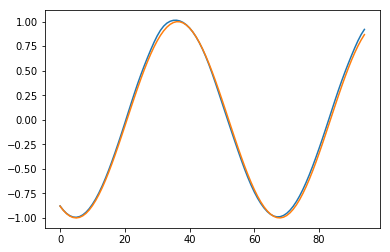

In [21]:
plt.plot(validation_prediction)
plt.plot(validation_target)

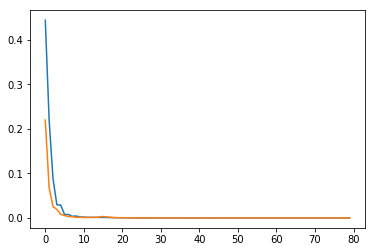

In [22]:
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])
